In [24]:
import pandas as pd
import pickle
import gzip
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pprint
from collections import defaultdict
import os

In [5]:
pickle_file_path = 'datasets/fractal_env_dataset_opt_100_nr_tra_100000_seed_1.pkl.gz'
        
with gzip.open(pickle_file_path, 'rb') as file:
    data = pickle.load(file)

if isinstance(data, list):
    first_100_objects = data[:100]
    pprint.pprint(first_100_objects)
    
else:
    print("The data is not a list as expected.")



[[(array([0.31492019, 0.40100431, 0.19309788, 0.09097762]), -250.0, 1, 1, 1),
  (array([0.75472481, 0.14907752, 0.07022794, 0.02596973]), -250.0, 2, 1, 1),
  (array([0.94119001, 0.04145222, 0.01316088, 0.0041969 ]), -100.0, 3, 0, 0),
  (array([9.20668679e-01, 7.53797542e-02, 3.26204505e-03, 6.89521327e-04]),
   -100.0,
   4,
   0,
   0),
  (array([9.64478678e-01, 3.49424685e-02, 5.05738657e-04, 7.31148349e-05]),
   -100.0,
   5,
   0,
   0),
  (array([9.72910400e-01, 2.66306410e-02, 3.94610250e-04, 6.43485221e-05]),
   -100.0,
   6,
   0,
   0),
  (array([0.34961856, 0.62952896, 0.01924506, 0.00160743]), -250.0, 7, 1, 1),
  (array([0.00661045, 0.94539256, 0.03941369, 0.00858329]), -250.0, 8, 1, 1),
  (array([0.4370771 , 0.53254059, 0.02471029, 0.00567201]), -100.0, 9, 0, 0),
  (array([5.67324506e-01, 4.27634938e-01, 4.62234153e-03, 4.18214503e-04]),
   -100.0,
   10,
   0,
   0),
  (array([5.05341616e-01, 4.89915496e-01, 4.27124224e-03, 4.71645484e-04]),
   -100.0,
   11,
   0,
   0),


  (array([0.00138004, 0.69426101, 0.24266203, 0.06169691]), -250.0, 3, 1, 1),
  (array([0.56187584, 0.31565932, 0.09661863, 0.02584621]), -100.0, 4, 0, 0),
  (array([0.63834096, 0.34329141, 0.01648775, 0.00187989]), -100.0, 5, 0, 0),
  (array([8.68617492e-01, 1.29760063e-01, 1.50146305e-03, 1.20981945e-04]),
   -100.0,
   6,
   0,
   0),
  (array([9.46676414e-01, 5.27499880e-02, 5.08466125e-04, 6.51319291e-05]),
   -100.0,
   7,
   0,
   0),
  (array([9.57968129e-01, 4.13736891e-02, 5.64905158e-04, 9.32770532e-05]),
   -100.0,
   8,
   0,
   0),
  (array([9.56838885e-01, 4.23994258e-02, 6.49167192e-04, 1.12522109e-04]),
   -100.0,
   9,
   0,
   0),
  (array([9.38077352e-01, 6.07415500e-02, 9.98286227e-04, 1.82811517e-04]),
   -100.0,
   10,
   0,
   0),
  (array([9.68484445e-01, 3.10962263e-02, 3.69651208e-04, 4.96775295e-05]),
   -100.0,
   11,
   0,
   0),
  (array([9.78472554e-01, 2.11823530e-02, 2.99649437e-04, 4.54439080e-05]),
   -100.0,
   12,
   0,
   0),
  (array([9.73356161e

In [6]:
returns_data = []
timestep_results = {}
state_data = defaultdict(lambda: [0, 0, 0, 0])
action_data = defaultdict(lambda: [0, 0, 0])

optimalities = [0, 25, 50, 75, 100]
seeds = range(1, 4)

for optimality in optimalities:
    for seed in seeds:
        pickle_file_path = f'datasets/fractal_env_dataset_opt_{optimality}_nr_tra_100000_seed_{seed}.pkl.gz'
        
        with gzip.open(pickle_file_path, 'rb') as file:
            data = pickle.load(file)

        if isinstance(data, list):
            timestep_rewards = [[] for _ in range(len(data[0]))]
            
            for trajectory in data:
                for index, step in enumerate(trajectory):
                    timestep_rewards[index].append(step[1])
            
            # Accumulate rewards by timestep
            for trajectory in data:
                for index, step in enumerate(trajectory):
                    timestep_rewards[index].append(step[1])
                    state_value = step[4]
                    action_value = step[3]
                    state_data[optimality][state_value] += 1
                    action_data[optimality][action_value] += 1
                    
                total_return = sum(timestep[1] for timestep in trajectory)
                
                returns_data.append({'Optimality': optimality, 'Seed': seed, 'Total Return': total_return})
            
            average_rewards_per_timestep = [np.mean(timestep) for timestep in timestep_rewards]
            
            timestep_results[(optimality, seed)] = average_rewards_per_timestep
                
        else:
            print(f"The data in file {pickle_file_path} is not a list as expected.")

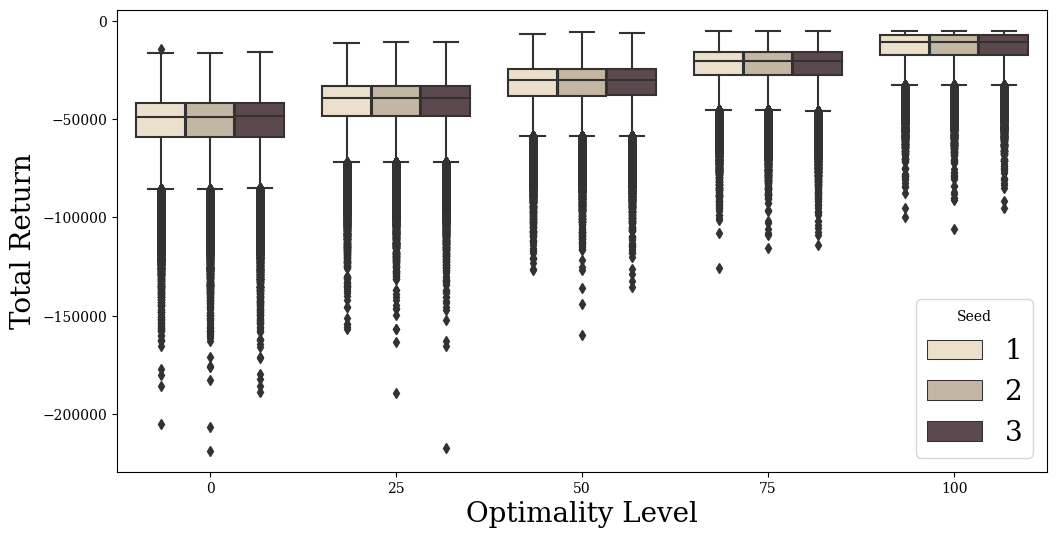

In [25]:
colors = ["#f1e0c5","#c9b79c","#5f464b","#8e4a49","#297373"]
output_dir = 'plots'
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

returns_df = pd.DataFrame(returns_data)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Optimality', y='Total Return', hue='Seed', data=returns_df, palette=colors)
plt.xlabel('Optimality Level', fontsize=20)
plt.ylabel('Total Return', fontsize=20)
plt.legend(title='Seed',fontsize=20)
plt.savefig(os.path.join('', 'avg_return.png'))
plt.show()

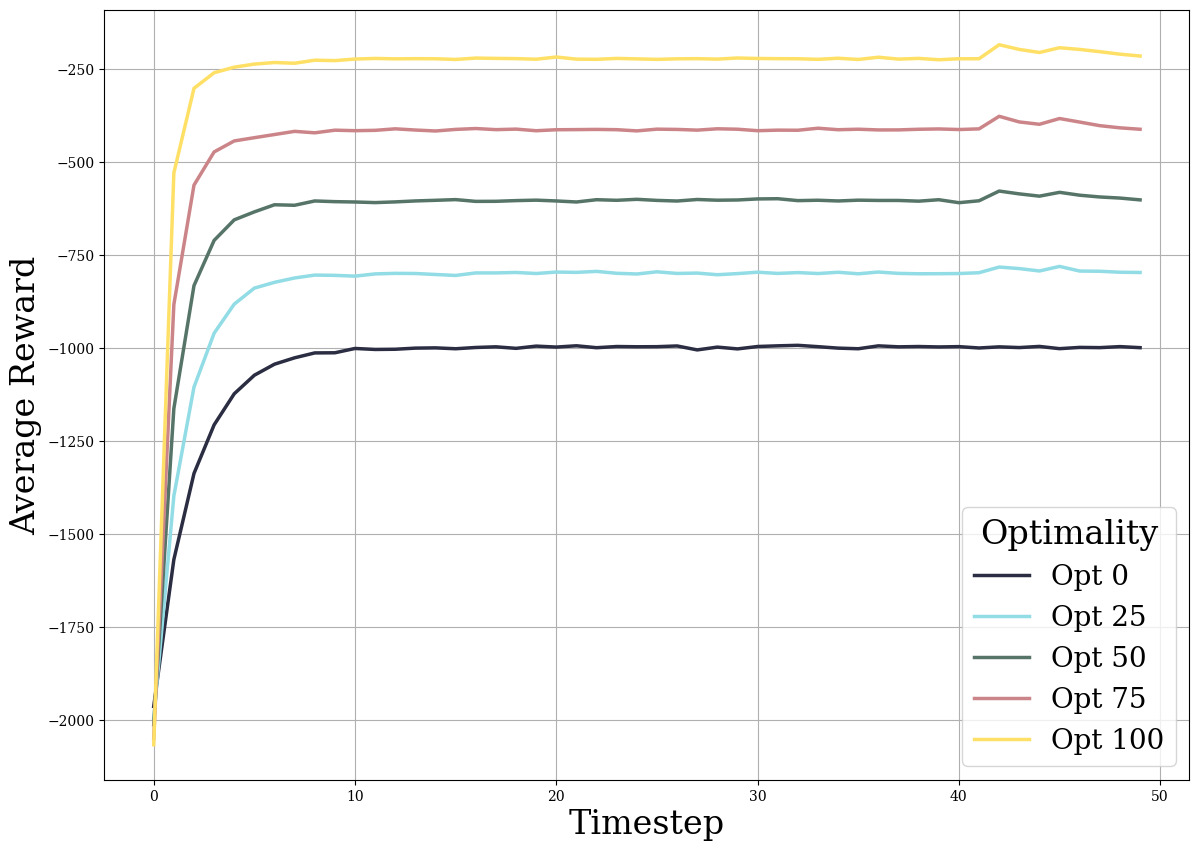

In [26]:
optimality_averaged_rewards = {}

for (optimality, seed), rewards in timestep_results.items():
    if optimality not in optimality_averaged_rewards:
        optimality_averaged_rewards[optimality] = []
    optimality_averaged_rewards[optimality].append(rewards)

for optimality in optimality_averaged_rewards:
    optimality_averaged_rewards[optimality] = np.mean(optimality_averaged_rewards[optimality], axis=0)

plt.rc('text', usetex=False)
plt.rc('font', family='serif')

colors = ["#2b2d42","#92DCE5","#567568","#cb8589","#ffe066"]

plt.figure(figsize=(14, 10))

for i, (optimality, avg_rewards) in enumerate(optimality_averaged_rewards.items()):
    plt.plot(avg_rewards, label=f'Opt {optimality}', color=colors[i], linewidth=2.5)

plt.xlabel('Timestep', fontsize=24)
plt.ylabel('Average Reward', fontsize=24)
plt.legend(title='Optimality', fontsize=20, title_fontsize=24)
plt.grid(True)

# plt.title('Average Reward per Timestep for Each Optimality Level, Averaged Over All Seeds', fontsize=20)
plt.savefig(os.path.join('', 'return_over_time.png'))
plt.show()


In [27]:
returns_df = pd.DataFrame(returns_data)

average_returns = returns_df.groupby('Optimality')['Total Return'].mean()

print("Average Total Returns by Optimality Level:")
for optimality, avg_return in average_returns.items():
    print(f"Optimality {optimality}: {avg_return:.2f}")

Average Total Returns by Optimality Level:
Optimality 0: -52294.48
Optimality 25: -42318.43
Optimality 50: -32488.74
Optimality 75: -22909.97
Optimality 100: -13284.45


     State  Proportion
0  State 1    0.823958
1  State 2    0.120344
2  State 3    0.037329
3  State 4    0.018369
     State  Proportion
0  State 1    0.814997
1  State 2    0.142851
2  State 3    0.028602
3  State 4    0.013550
     State  Proportion
0  State 1    0.797491
1  State 2    0.169137
2  State 3    0.023257
3  State 4    0.010115
     State  Proportion
0  State 1    0.771096
1  State 2    0.201264
2  State 3    0.019831
3  State 4    0.007809
     State  Proportion
0  State 1    0.736093
1  State 2    0.240468
2  State 3    0.017501
3  State 4    0.005938


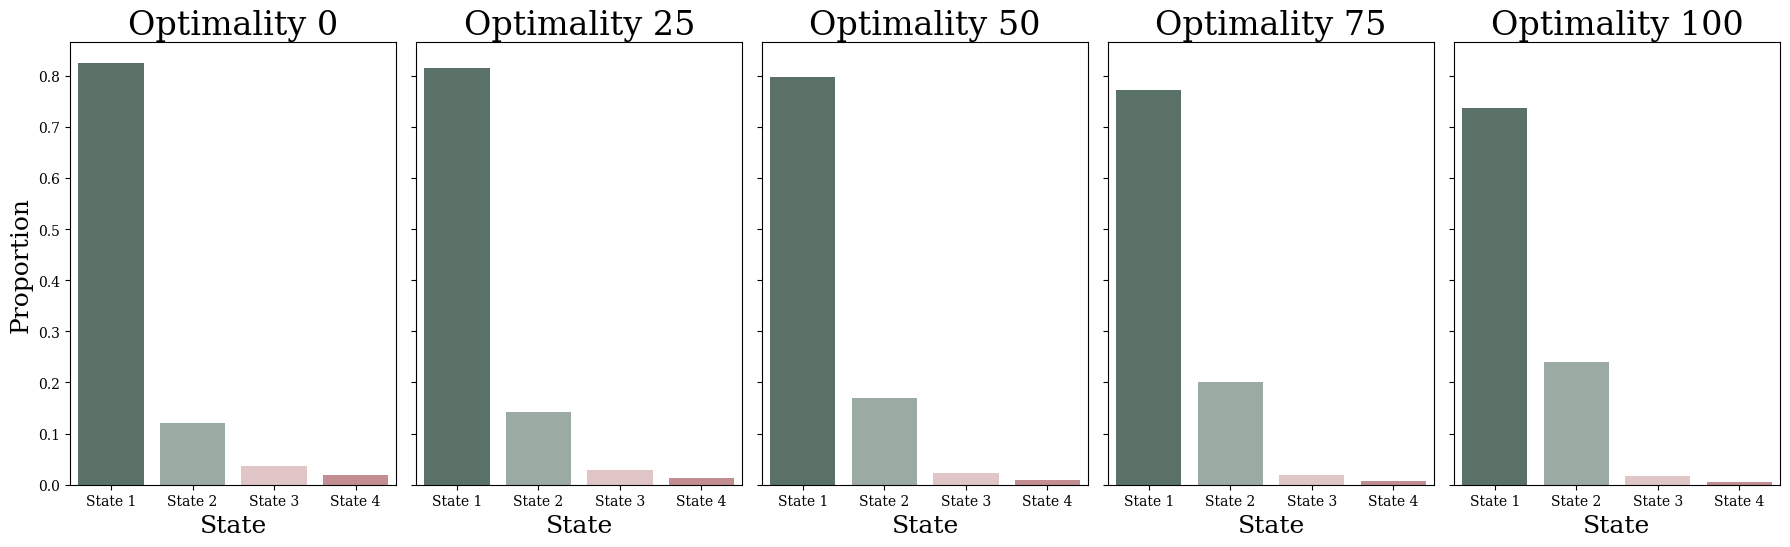

In [31]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

num_plots = len(state_data)

fig, axs = plt.subplots(1, num_plots, figsize=(18, 6), sharey=True)

for i, (optimality, state_counts) in enumerate(state_data.items()):
    total_visits = sum(state_counts)
    proportions = [count / total_visits for count in state_counts]

    df = pd.DataFrame({
        'State': ['State 1', 'State 2', 'State 3', 'State 4'],
        'Proportion': proportions
    })
    
    print(df)
    colors = ["#567568","#9aaca4","#e5c2c4","#cb8589"]


    sns.barplot(x='State', y='Proportion', data=df, palette=colors, ax=axs[i])
    axs[i].set_title(f'Optimality {optimality}', fontsize=24)
    axs[i].set_xlabel('State', fontsize=18)
    axs[i].set_ylabel('Proportion' if i == 0 else '', fontsize=18)  # Only label the y-axis on the first plot
    axs[i].grid(False)

#fig.suptitle('State Visitation Frequency by Optimality Level (Proportions)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])  # Adjust to prevent overlap with the suptitle
plt.savefig(os.path.join('', 'state_dist.png'))
plt.show()


     Action  Proportion
0  Action 1    0.333213
1  Action 2    0.333454
2  Action 3    0.333334
     Action  Proportion
0  Action 1    0.456501
1  Action 2    0.284453
2  Action 3    0.259046
     Action  Proportion
0  Action 1    0.572417
1  Action 2    0.246782
2  Action 3    0.180802
     Action  Proportion
0  Action 1    0.675148
1  Action 2    0.224208
2  Action 3    0.100643
     Action  Proportion
0  Action 1    0.759191
1  Action 2    0.221735
2  Action 3    0.019074


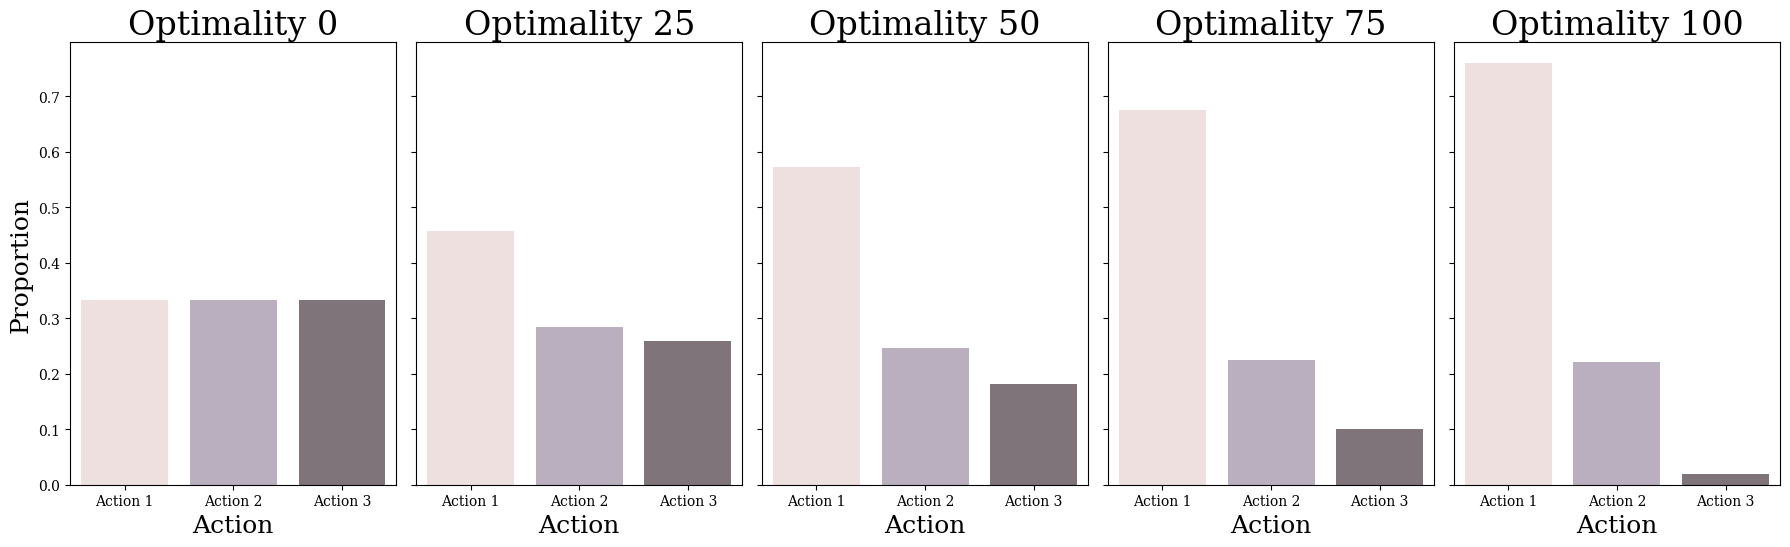

In [30]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

num_plots = len(action_data)

fig, axs = plt.subplots(1, num_plots, figsize=(18, 6), sharey=True)

for i, (optimality, action_counts) in enumerate(action_data.items()):
    total_visits = sum(action_counts)
    proportions = [count / total_visits for count in action_counts]

    df = pd.DataFrame({
        'Action': ['Action 1', 'Action 2', 'Action 3'],
        'Proportion': proportions
    })
    
    print(df)
    colors = ["#f1dede","#bbacc1","#80727b"]

    sns.barplot(x='Action', y='Proportion', data=df, palette=colors, ax=axs[i])
    axs[i].set_title(f'Optimality {optimality}', fontsize=24)
    axs[i].set_xlabel('Action', fontsize=18)
    axs[i].set_ylabel('Proportion' if i == 0 else '', fontsize=18)  # Only label the y-axis on the first plot
    axs[i].grid(False)

plt.tight_layout(rect=[0, 0, 1, 0.93])  # Adjust to prevent overlap with the suptitle
plt.savefig(os.path.join('', 'action_dist.png'))
plt.show()